In [61]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
df = pd.read_csv("C:/Users/nitin/Downloads/_cancer_dataset_uae.csv")
print(data.head())


  patient_id  age  gender nationality        emirate diagnosis_date  \
0  PAT000001   69  Female     Emirati  Umm Al Quwain     2020-11-30   
1  PAT000002   32    Male     Emirati  Umm Al Quwain     2015-10-10   
2  PAT000003   89    Male     Emirati      Abu Dhabi     2018-02-13   
3  PAT000004   78  Female     Emirati      Abu Dhabi     2022-02-04   
4  PAT000005   38  Female     Emirati       Fujairah     2019-12-03   

  cancer_type cancer_stage treatment_type treatment_start_date  \
0       Liver           II      Radiation           2020-12-04   
1    Leukemia          III        Surgery           2015-11-05   
2       Liver          III      Radiation           2018-08-03   
3        Lung          III      Radiation           2022-03-13   
4  Pancreatic           II   Chemotherapy           2020-02-29   

                     hospital primary_physician          outcome death_date  \
0     Sheikh Khalifa Hospital          Dr. VO41        Recovered        NaN   
1              Dub

In [37]:
print(data.info())

print(data.describe())

print("Columns in the dataset:")
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")
print(data.columns)

region_counts = data['emirate'].value_counts()










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            10000 non-null  object
 1   age                   10000 non-null  int64 
 2   gender                10000 non-null  object
 3   nationality           10000 non-null  object
 4   emirate               10000 non-null  object
 5   diagnosis_date        10000 non-null  object
 6   cancer_type           10000 non-null  object
 7   cancer_stage          10000 non-null  object
 8   treatment_type        10000 non-null  object
 9   treatment_start_date  10000 non-null  object
 10  hospital              10000 non-null  object
 11  primary_physician     10000 non-null  object
 12  outcome               10000 non-null  object
 13  death_date            992 non-null    object
 14  cause_of_death        992 non-null    object
 15  smoking_status        10000 non-null 

In [63]:
# Check for missing values in each column
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
patient_id                 0
age                        0
gender                     0
nationality                0
emirate                    0
diagnosis_date             0
cancer_type                0
cancer_stage               0
treatment_type             0
treatment_start_date       0
hospital                   0
primary_physician          0
outcome                    0
death_date              9008
cause_of_death          9008
smoking_status             0
comorbidities           4047
ethnicity                  0
weight                     0
height                     0
dtype: int64


In [64]:
data_cleaned = data.dropna()

print("Missing values after dropping rows:")
print(data_cleaned.isnull().sum())


Missing values after dropping rows:
patient_id              0
age                     0
gender                  0
nationality             0
emirate                 0
diagnosis_date          0
cancer_type             0
cancer_stage            0
treatment_type          0
treatment_start_date    0
hospital                0
primary_physician       0
outcome                 0
death_date              0
cause_of_death          0
smoking_status          0
comorbidities           0
ethnicity               0
weight                  0
height                  0
dtype: int64


In [65]:
data_filled = data.fillna(data.mean(numeric_only=True))

print("Missing values after filling:")
print(data_filled.isnull().sum())


Missing values after filling:
patient_id                 0
age                        0
gender                     0
nationality                0
emirate                    0
diagnosis_date             0
cancer_type                0
cancer_stage               0
treatment_type             0
treatment_start_date       0
hospital                   0
primary_physician          0
outcome                    0
death_date              9008
cause_of_death          9008
smoking_status             0
comorbidities           4047
ethnicity                  0
weight                     0
height                     0
dtype: int64


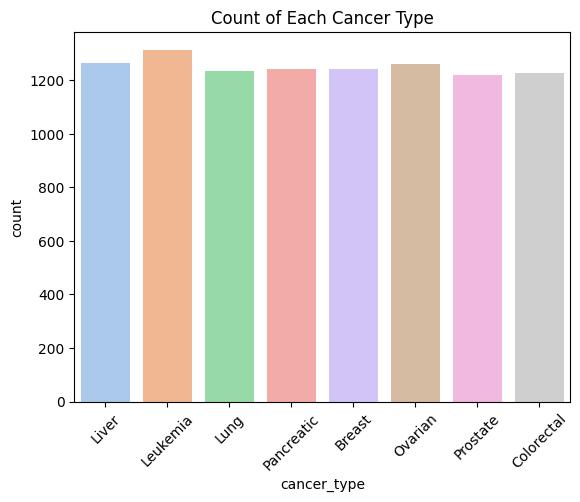

In [70]:
# Replace 'Cancer_Type' with the actual column name in your dataset
sns.countplot(x='cancer_type', data=data, hue='cancer_type', palette='pastel', legend=False)
plt.title("Count of Each Cancer Type")
plt.xticks(rotation=45)
plt.show()


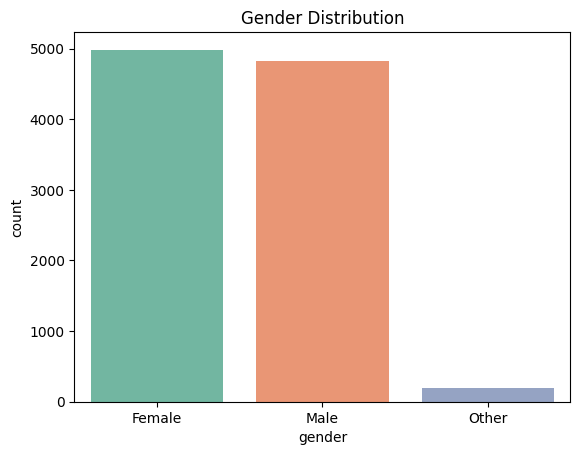

In [72]:
# Replace 'Gender' with the actual column name
sns.countplot(x='gender', data=data, hue='gender', palette='Set2', legend=False)
plt.title("Gender Distribution")
plt.show()



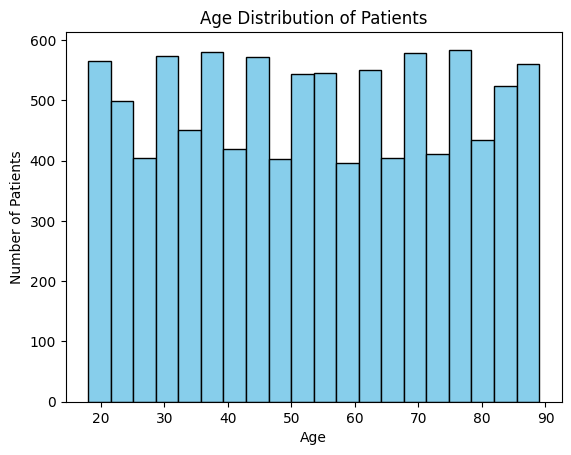

In [74]:
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()



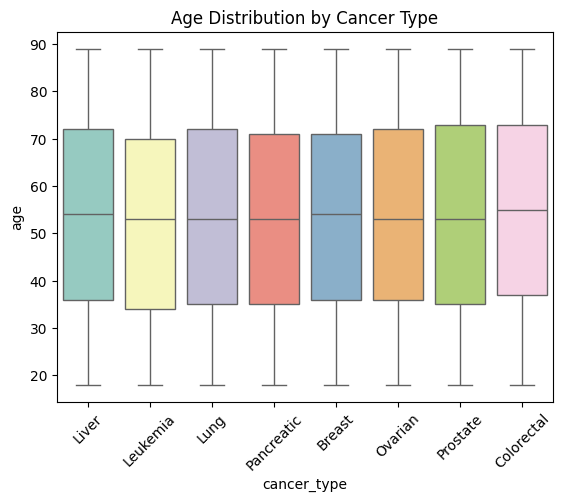

In [77]:
sns.boxplot(x='cancer_type', y='age', data=data, hue='cancer_type', palette='Set3', legend=False)
plt.title("Age Distribution by Cancer Type")
plt.xticks(rotation=45)
plt.show()


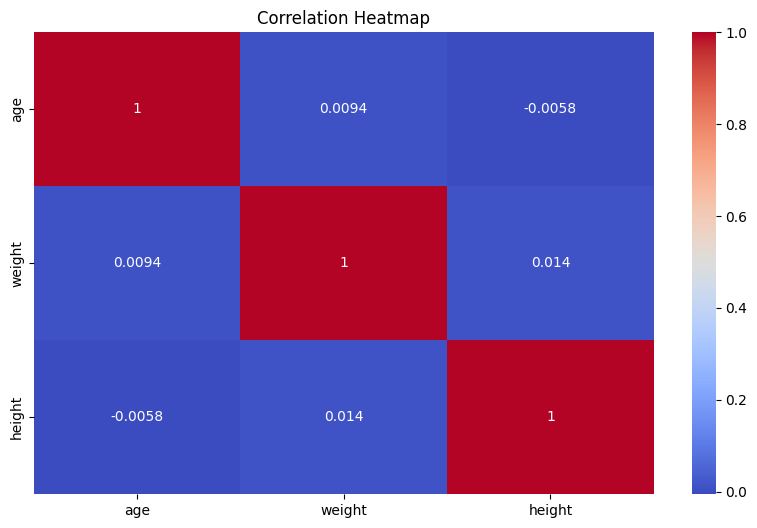

In [78]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


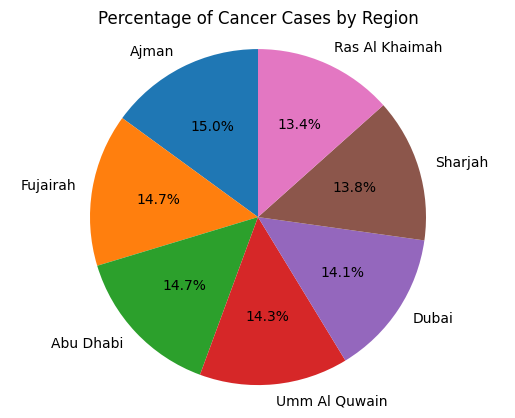

In [88]:
#1. Pie Chart – Show Percentage of Cancer Cases by Region
#Objective: Visualize how cancer cases are distributed across different Emirates/regions in the UAE.
region_counts = data['emirate'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Cancer Cases by Region")
plt.axis('equal')
plt.show()


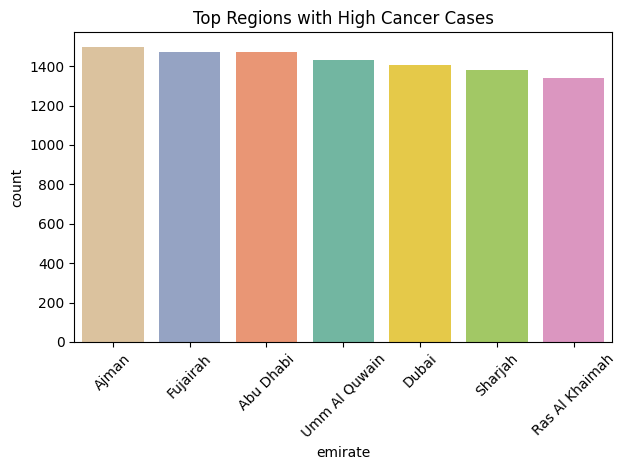

In [84]:
#2. Bar Chart – Identify Regions with Highest Cancer Cases
#Objective: Highlight the regions/emirates with the highest number of cancer patients.
sns.countplot(x='emirate', data=data, hue='emirate', order=data['emirate'].value_counts().index, palette='Set2', legend=False)
plt.title("Top Regions with High Cancer Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The year with the maximum cancer cases is: 2020


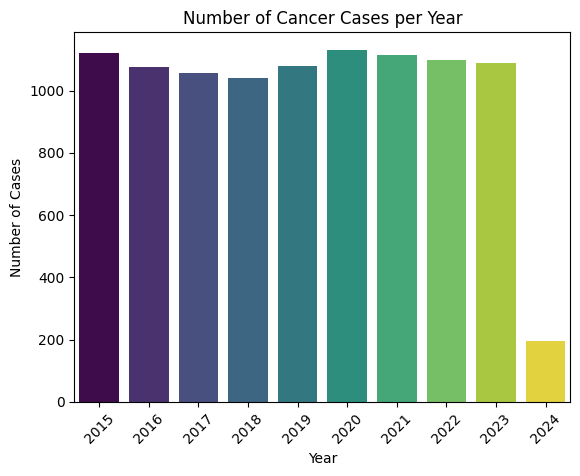

In [85]:
#3: Year-wise Cancer Case Analysis
#Objective:To identify trends in cancer cases over the years and determine the year with the highest number of reported cases.
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce')

# Extract year
df['Year'] = df['Diagnosis_Date'].dt.year

# Count cases per year
year_counts = df['Year'].value_counts().sort_index()

# Find year with max cases
max_year = year_counts.idxmax()
print(f"The year with the maximum cancer cases is: {max_year}")

# Prepare data for seaborn
year_df = pd.DataFrame({'Year': year_counts.index, 'Cases': year_counts.values})

# Bar plot
sns.barplot(data=year_df, x='Year', y='Cases', hue='Year', palette='viridis', legend=False)
plt.title("Number of Cancer Cases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

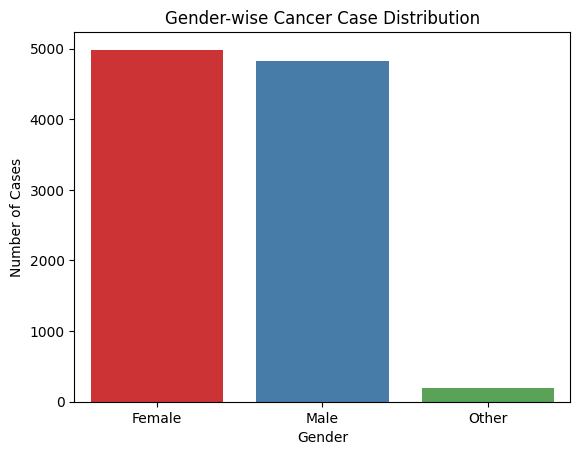

In [86]:
# 4. Gender-wise Cancer Distribution (Alternative Objective)
#Objective: Compare how cancer cases are distributed between males and females.
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set1', legend=False)
plt.title("Gender-wise Cancer Case Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Cases")
plt.show()


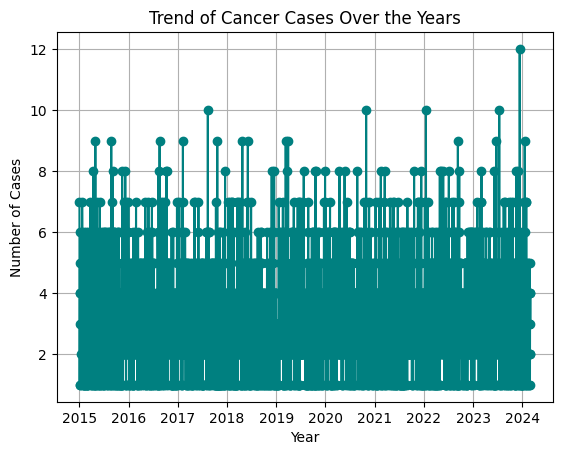

In [87]:
#5. Line Plot – Cancer Cases Trend Over the Years
#Objective: Show how cancer cases have increased or decreased over time.
yearly_cases = df['Diagnosis_Date'].value_counts().sort_index()
plt.plot(yearly_cases.index, yearly_cases.values, marker='o', linestyle='-', color='teal')
plt.title("Trend of Cancer Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()
